In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
for i in df.columns:
  if df[i].nunique() < 10:
    print(df[i].value_counts())
    print()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

isFraud
0    6354407
1       8213
Name: count, dtype: int64

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64



In [4]:
df.isnull().sum()
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

In [7]:
round(df['isFraud'].value_counts()[1] / df.shape[0] * 100 ,2)

np.float64(0.13)

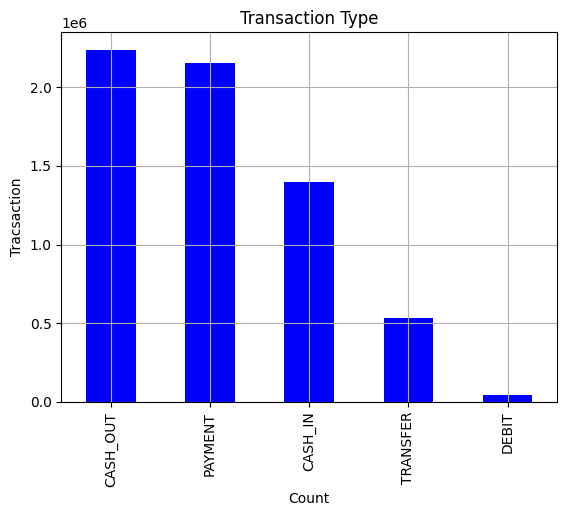

In [8]:
df['type'].value_counts().plot(kind="bar", title="Transaction Type", color="blue")
plt.xlabel("Count")
plt.ylabel("Tracsaction")
plt.grid(True)
plt.show()

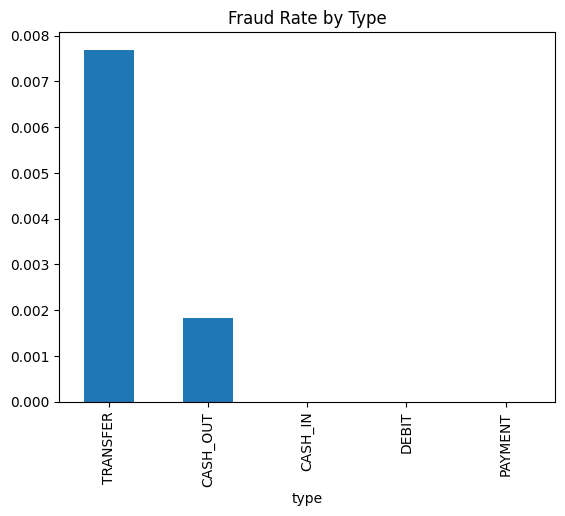

In [9]:
fraud_rate_by_types = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_rate_by_types.plot(kind="bar")
plt.title("Fraud Rate by Type")
plt.show()

In [10]:
df.amount.describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

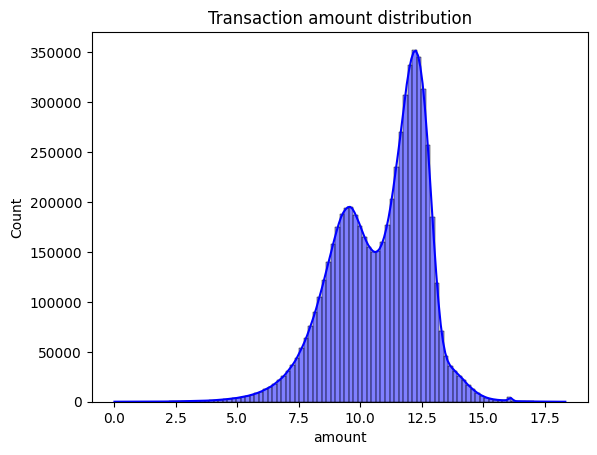

In [11]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="blue")
plt.title("Transaction amount distribution")
plt.show()

Text(0.5, 1.0, 'Amount vs isFraud')

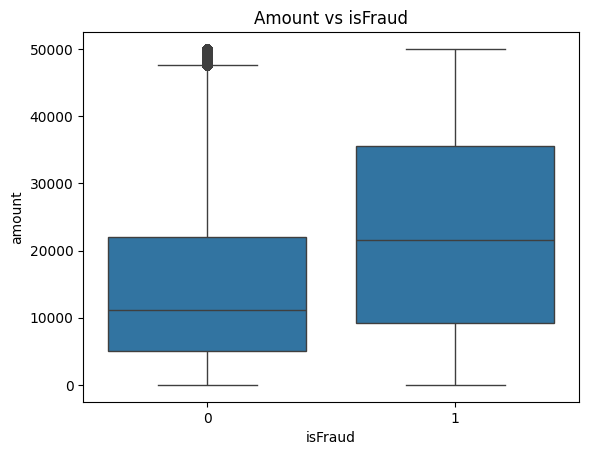

In [12]:
sns.boxplot(data = df[df['amount'] < 50000], x = "isFraud", y= "amount")
plt.title("Amount vs isFraud")

In [13]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [14]:
(df['balanceDiffOrig'] < 0).sum()

np.int64(1399253)

In [15]:
(df['balanceDiffDest'] < 0).sum()

np.int64(2806464)

In [16]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [17]:
print("hello")

hello


In [18]:
df.drop(columns="step", inplace=True)

In [19]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [20]:
top_sender = df.groupby("nameOrig")["newbalanceOrig"].sum().sort_values(ascending=False).head(10)
top_sender

nameOrig
C40489106      49585040.37
C726730575     47316255.05
C559275248     43686616.33
C2080486364    43673802.21
C1568160039    41690842.64
C438977024     41432359.46
C590657619     40399045.08
C1551381510    39585040.37
C1841909664    38946233.02
C1450387949    38939424.03
Name: newbalanceOrig, dtype: float64

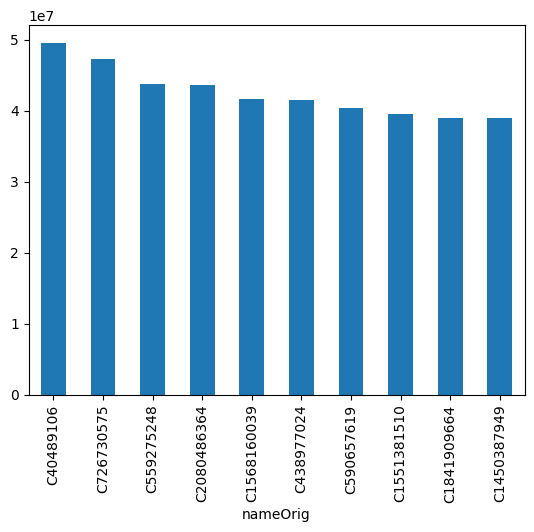

In [21]:
top_sender.plot(kind="bar")
plt.show()

In [22]:
df["nameOrig"].value_counts().head(10)

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [23]:
df[df["nameOrig"] == 'C1677795071'].value_counts()

type      amount     nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  balanceDiffOrig  balanceDiffDest
CASH_OUT  226611.90  C1677795071  0.00           0.00            C1808829708  266677.78       493289.68       0        0               0.00             -226611.9          1
PAYMENT   8285.71    C1677795071  19391.35       11105.64        M1419815811  0.00            0.00            0        0               8285.71           0.0               1
          9837.77    C1677795071  0.00           0.00            M1468304501  0.00            0.00            0        0               0.00              0.0               1
Name: count, dtype: int64

In [24]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

<Axes: xlabel='type', ylabel='count'>

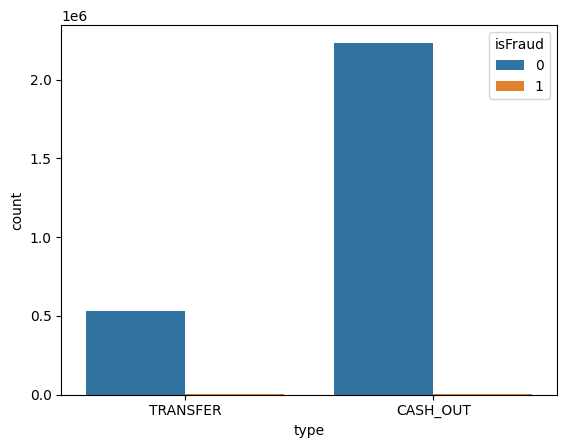

In [25]:
sns.countplot(fraud_types, x="type", hue="isFraud")

In [26]:
df_model = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [27]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [28]:
X = df_model.drop("isFraud", axis=1)
y = df_model["isFraud"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [31]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig",	"oldbalanceDest", "newbalanceDest"]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop="first"), categorical)
], remainder="drop")

In [32]:
smote = SMOTE(random_state=42)

pipeline = Pipeline([
    ("prep", preprocessor),
    ('smote', smote),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [33]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred = pipeline.predict(X_test)

In [35]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.96      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [37]:
confusion_matrix(y_test, y_pred)

array([[1800772,  105550],
       [    101,    2363]])

In [38]:
pipeline.score(X_test, y_test)

0.9446501598398144

In [39]:
import joblib 

In [40]:
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']